## Determine the position of a football player based on his attributes

Data source: https://www.kaggle.com/karangadiya/fifa19

## Introduction

The FIFA series is the most popular soccer game franchise. FIFA19 was released in 2018 by EA Vancouver. The data from this game, including the characteristics of each player, has been made available on the Kaggle website. On their basis, we will want to create a model that will determine the position on which the player should play, taking into account his characteristics.

## Necessary Libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB

## Get Data

In [63]:
# Get Data
df = pd.read_csv('data.csv', index_col = 0)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Initial Data Processing
List of attributes:

In [64]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

Many attributes can be discarded right away because they do not fit our model (they have no influence on the position the player plays). These attributes are:
- ID, 
- Name,
- Age,
- Photo, 
- Nationality, 
- Flag,
- Overall,
- Potential, 
- Club, 
- Club Logo, 
- Value, 
- Wage, 
- Special, 
- International Reputation, 
- Work Rate,
- Body Type - atrybut ten jest używany do określenia modelu zawodnika w grze, dysponujemy bardziej szczegółowymi atrybutami fizycznymi;
- Real Face, 
- Jersey Number, 
- Joined, 
- Loaned From, 
- Contract Valid Until, 
- 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 
- Release Clause.

In [65]:
# Getting rid of unnecessary columns
df = df.drop(columns=['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo'])
df = df.drop(columns=['Value', 'Wage', 'Special', 'International Reputation', 'Work Rate', 'Body Type', 'Real Face'])
df = df.drop(columns=['Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW'])
df = df.drop(columns=['LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM'])
df = df.drop(columns=['CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'])

We check for data gaps:

In [66]:
df.isnull().sum() # the number of NaN values for each column

Preferred Foot     48
Weak Foot          48
Skill Moves        48
Position           60
Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

It appears that 48 records do not contain data. This is only 0.3% of our collection, so we remove these records.

In [67]:
df.dropna(inplace = True)

#### Description of numerical attributes:

In [68]:
df.describe().T # description of numerical data

,count,mean,std,min,25%,50%,75%,max
Weak Foot,18147.0,2.947154,0.660498,1.0,3.0,3.0,3.0,5.0
Skill Moves,18147.0,2.361492,0.756274,1.0,2.0,2.0,3.0,5.0
Crossing,18147.0,49.738414,18.364255,5.0,38.0,54.0,64.0,93.0
Finishing,18147.0,45.550229,19.527445,2.0,30.0,49.0,62.0,95.0
HeadingAccuracy,18147.0,52.300766,17.381753,4.0,44.0,56.0,64.0,94.0
ShortPassing,18147.0,58.695432,14.696075,7.0,54.0,62.0,68.0,93.0
Volleys,18147.0,42.912217,17.695900,4.0,30.0,44.0,57.0,90.0
Dribbling,18147.0,55.375158,18.912224,4.0,49.0,61.0,68.0,97.0
Curve,18147.0,47.176283,18.396009,6.0,34.0,48.0,62.0,94.0
FKAccuracy,18147.0,42.866038,17.480034,3.0,31.0,41.0,57.0,94.0


Almost all the attributes we take are normalized 0-100, which will help us in our analysis and model building.

The Weak Foot and Skill Moves attributes, which are given on a scale of 1-5, we will normalize 0-100 to match the rest.

In [69]:
norm_list = ["Weak Foot", "Skill Moves"]

for n in norm_list:
    df[n] = 100 * df[n]/df[n].max() # normalisation 0-100

df[norm_list].head()

,Weak Foot,Skill Moves
0,80.0,80.0
1,80.0,100.0
2,100.0,100.0
3,60.0,20.0
4,100.0,80.0


#### Description of categorical attributes:

In [70]:
df.drop(columns = ["Position"]).describe(include=['object']).T

,count,unique,top,freq
Preferred Foot,18147,2,Right,13938
Height,18147,21,6'0,2880
Weight,18147,57,165lbs,1483


We have only 3 categorical attributes. However, we can easily convert them: Height and Weight to numeric and Preferred Foot to binary.

We can convert the Height attribute to numeric by changing the units to inches. Additionally, we will normalize it so that its values are scaled the same as the skill attributes, making further data analysis easier.

In [71]:
def ft_to_inch(ft): # function to convert [feet+inches] to [inches]
    x = [int(i) for i in ft.split("'")] 
    x[1] += x[0] * 12
    return x[1]

df["Height"] = df["Height"].map(lambda x: ft_to_inch(x))
df["Height"] = round(100*df["Height"]/df["Height"].max(), 0) # normalisation 0-100
df["Height"].describe()

count    18147.000000
mean        88.061332
std          3.317462
min         75.000000
25%         85.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: Height, dtype: float64



Similarly, we can make the Weight attribute numeric by removing the lbs suffix from each record. Also, we normalize this attribute 0-100.

In [72]:
df["Weight"] = df["Weight"].map(lambda x:  int(round(int(x[:-3]), 0)))
df["Weight"] = round(100*df["Weight"]/df["Weight"].max(), 0)
df["Weight"].describe()

count    18147.000000
mean        68.257012
std          6.418491
min         45.000000
25%         63.000000
50%         68.000000
75%         72.000000
max        100.000000
Name: Weight, dtype: float64

Finally, we can make the Preferred Foot attribute a binary attribute. We will assign the value 1 to left-footed players and 0 to right-footed players, and call the attribute isLeft.

In [73]:
df['isLeft'] = df["Preferred Foot"].map(lambda x: 0 if x == "Right" else 1)
df.drop(columns=["Preferred Foot"], inplace = True)
df['isLeft'].describe()

count    18147.000000
mean         0.231939
std          0.422082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: isLeft, dtype: float64

## Exploratory Data Analysis
We check how many unique values our decision attribute has:

In [74]:
len(df.Position.unique())

27

Our decision attribute has many unique values. It is possible that for individual positions there are very few representatives and we can ignore them. So we check how many players are in each position.

In [75]:
df.groupby("Position")["Position"].count().sort_values(ascending = False)

Position
ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

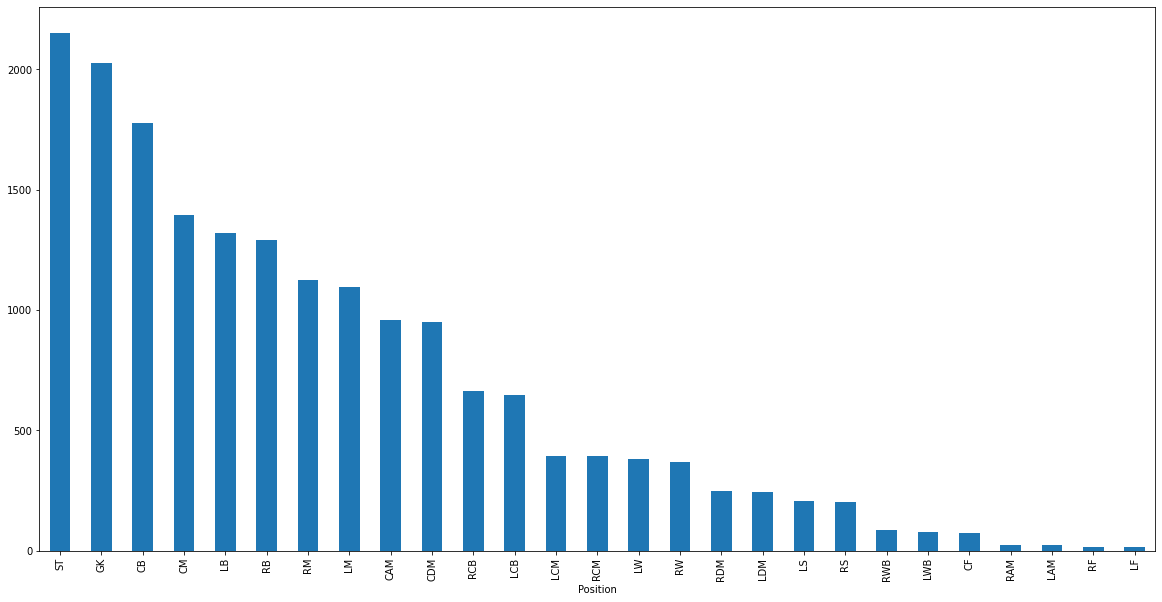

In [76]:
df.groupby("Position")["Position"].count().sort_values(ascending = False).plot(kind = 'bar', figsize=(20,10))

We see that the RAM, LAM, RF, and LF items have very few representatives - there are only 73 in total for over 18,000 records in the entire collection. It is not worth including such a sparse set in the model because they are not very representative and may negatively affect the accuracy of the model. For this reason, we will drop these items from the data.

In [77]:
df = df[(df.Position != 'RAM') & (df.Position != 'LAM') & (df.Position != 'RF') & (df.Position != 'LF')]

The other positions can be grouped to make further analysis easier. It seems natural to divide them into forwards, midfielders, defenders and goalkeepers.

In [78]:
defe = ['RWB', 'RCB', 'RB', 'LWB', 'LCB', 'LB', 'CB'] # defenders
fwd = ['ST', 'RW', 'RS', 'LW', 'LS', 'CF'] # forwards
mid = ['RM', 'RDM', 'RCM', 'LDM', 'LCM', 'CM', 'CDM', 'CAM', 'LM'] # midfielder
gk = ['GK'] # goalkeeper
all_pos = fwd + mid + defe + gk # all postions

### Categorical Attributes

We will start our analysis with the only non-numeric attribute, which isLeft (created from Preferred Foot). First, we will present a graph showing what percentage of footballers at a given position are left-footed.

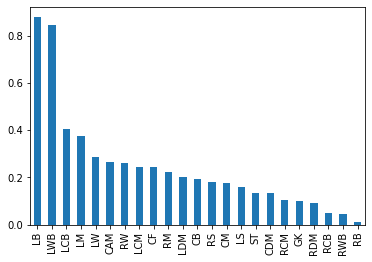

In [79]:
# chart for preferred leg
dict1 = {}
for p in all_pos:
    dict1[p] = df[df.Position == p].groupby('isLeft')['isLeft'].count()[1] / df[df.Position == p].count()["isLeft"]

lfoot = pd.DataFrame.from_dict(dict1, orient='index').sort_values(by = 0, ascending = False)
lfoot.plot.bar(legend = False)

You can see from the chart that players playing on the left are more often left-footed than those playing on the right (especially the defenders). To better show this relationship, we can create an analogous chart where we divide the players into those who play on the right (R) and those who play on the left (L).

([<matplotlib.axis.XTick at 0x7f3a79228950>,
 [Text(0, 0, 'R'), Text(0, 0, 'L')])

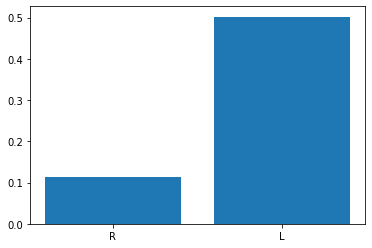

In [80]:
rl = {}
rl['R'] = df[df.Position.str.startswith('R')].groupby('isLeft')['isLeft'].count()[1] / df[df.Position.str.startswith('R')].count()["Position"]
rl['L'] = df[df.Position.str.startswith('L')].groupby('isLeft')['isLeft'].count()[1] / df[df.Position.str.startswith('L')].count()["Position"]
plt.bar(range(len(rl)), list(rl.values()), align='center')
plt.xticks(range(len(rl)), list(rl.keys()))

The above graph shows that half of the players playing on the left side are left-legged, while barely 10% of the players play on the right side. The "isLeft" attribute will therefore be useful in our model, to distinguish which side a footballer plays on.

We will capture the binary attribute "isLeft" separately so that it does not interfere with the analysis of the numerical attributes.

In [81]:
isLeft = df["isLeft"]
df.drop(columns = ["isLeft"], inplace = True)

### Numeric attributes

Due to the large number of numeric descriptive attributes and the many unique values of the decision attribute, we are limited in our ability to create readable graphs. For visualization for classification tasks, the seaborn.pairplot with group distinction (hue attribute) works great. Here, however, we have 23 items to distinguish and such a graph would be completely unreadable. Therefore we will present the data as a heatmap, where the values will be the average values of a given attribute for players in a given position.

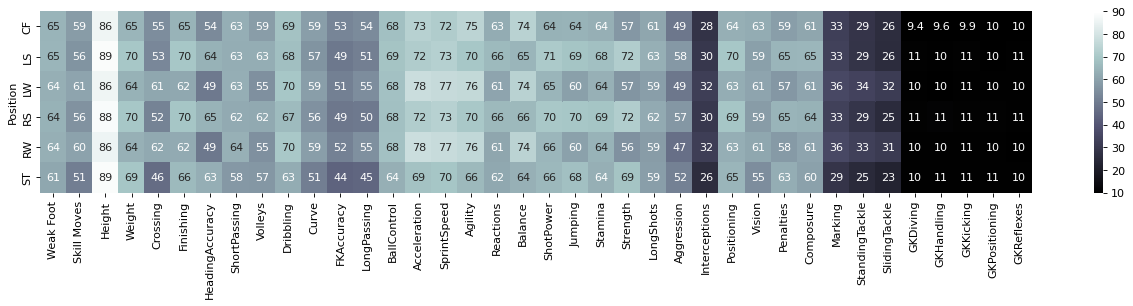

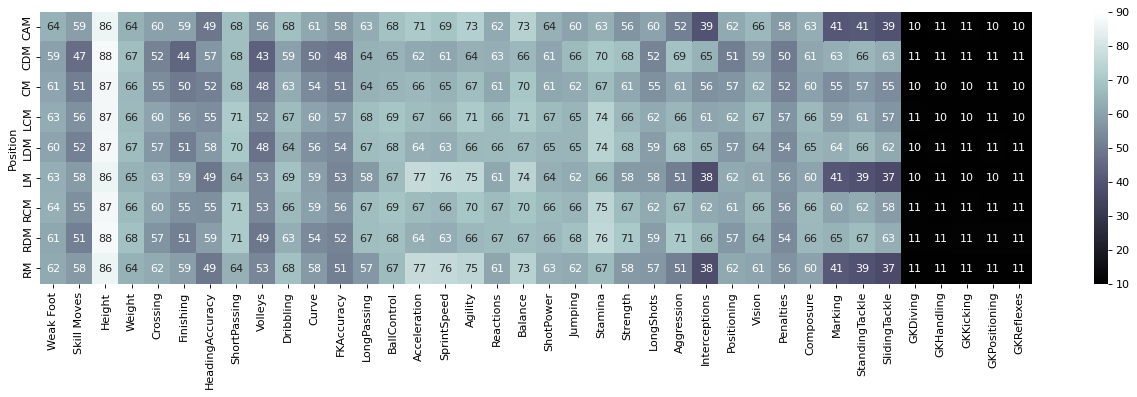

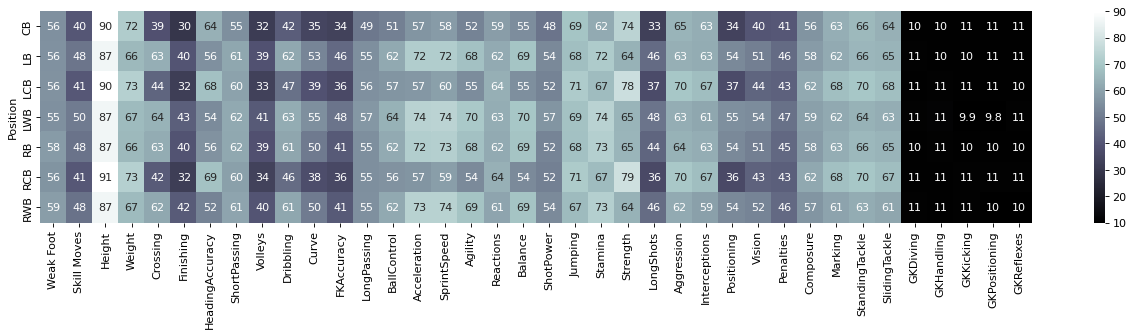

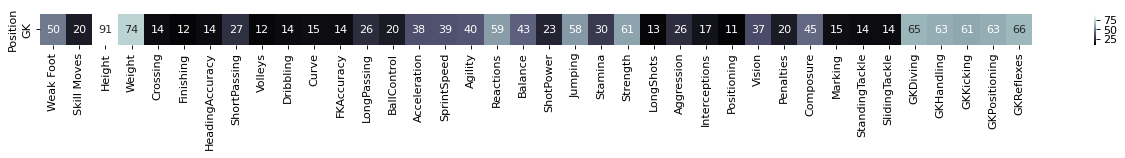

In [82]:
for p in [fwd, mid, defe, gk]: 
    dff = df.loc[df['Position'].isin(p)].groupby('Position', as_index=True).mean()
    plt.figure(figsize=(20,len(p)/2),dpi = 80)
    sns.heatmap(dff, cmap="bone", annot=True, vmin = 10, vmax = 90)

From the above graph we can read many interesting correlations. At first glance we can clearly see how strongly correlated are the goalie attributes and how unambiguously they are able to distinguish a goalie from others. 

We also have a sizable group of attributes that distinguish **offensive players from defensive players**. These include:
- Skill Moves (higher for offensive players)
- Finishing (higher for offensive players)
- Volleys (higher for offensive players)
- Agression (higher for defensive players
- Interceptions (higher for defensive players)
 
We also have a couple of attributes that distinguish **defenders from midfielders and forwards** more strongly, such as
- Weak Foot
- LongShots
- Composure

From our data we can also clearly distinguish **players who play on the sides from those who play in the middle**. Players who play on the wings are usually faster and more agile. These attributes are:
- Crossing
- Dribbling
- Acceleration
- SprintSpeed

The differences between central and side players are especially visible among defenders. Central defenders are known for their good head play, while side defenders are known for their speed and good passing ability. These differences are shown by the attributes:
- HeadingAccuracy
- Curve (also LF and RF)
- Balance
- Positioning

There is no attribute in the data that clearly separates the midfielders from the rest. Many of their attributes are similar in value to the forwards. The best attributes seem to be LongPassing and Finishing.

## Merge correlated attributes

Since many attributes point to the same dependencies, it is likely that many of them are also highly correlated. We can merge the most correlated attributes with each other to simplify the model.

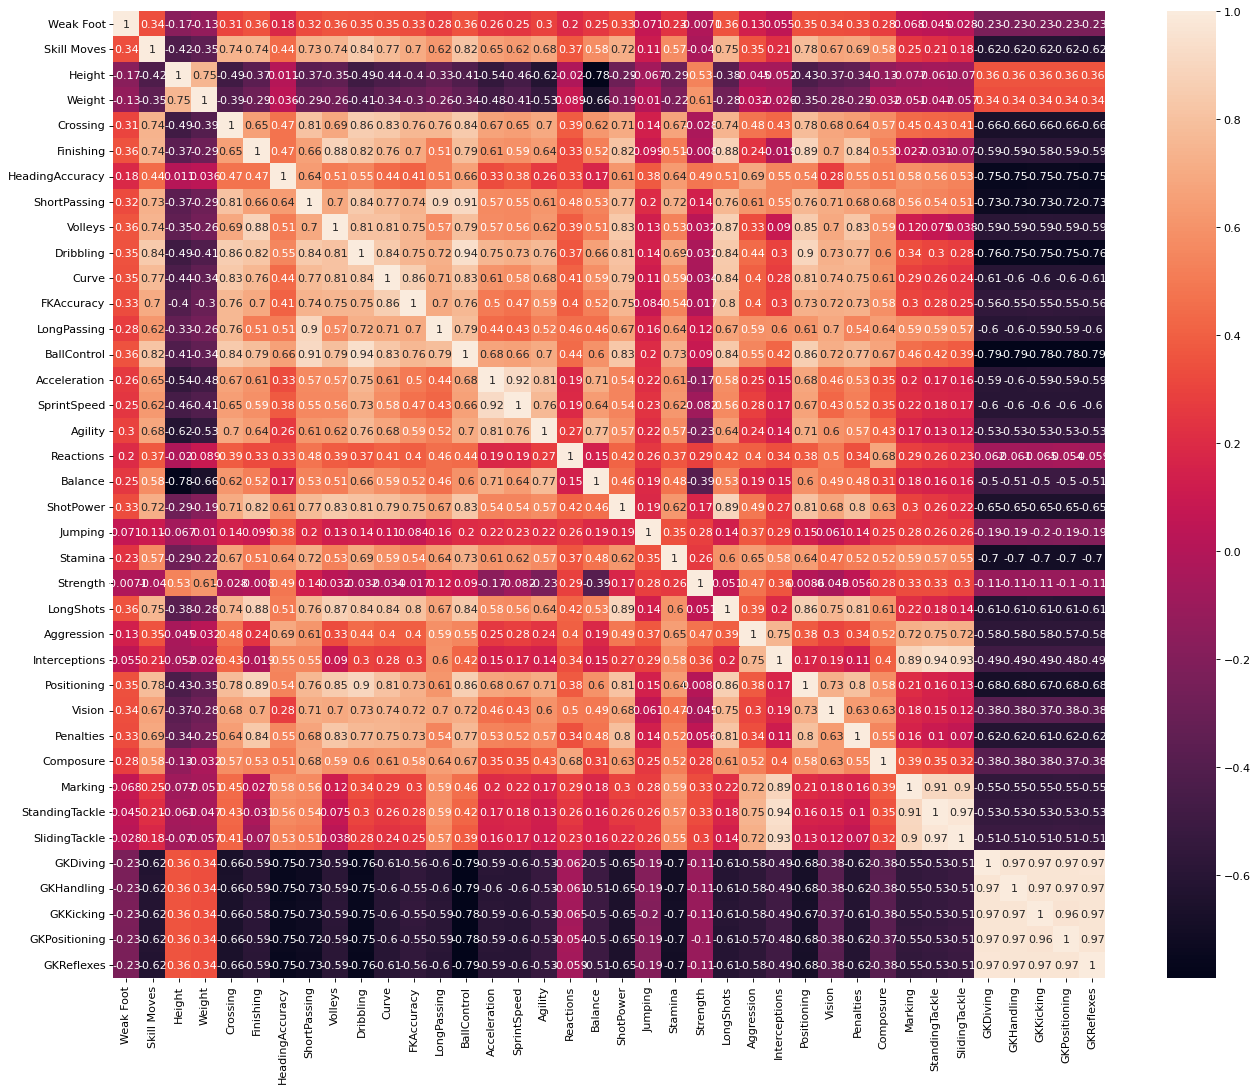

In [83]:
plt.figure(figsize=(20,16),dpi = 80)
sns.heatmap(df.corr(),annot = df.corr()) # heat map with correlation

From the heat map, we see that the goalie attributes are the most correlated.  We also see a high correlation between the defensive attributes (Marking, Interceptions, StandingTackle, SlidingTackle). The speed attributes SprintSpeed and Acceleration are also highly correlated. 

To merge the most correlated attributes we used a function that merges all the attributes with correlation coefficients above a given threshold. The value of the merged attribute is taken as the arithmetic mean of the constituent attributes.

In [84]:
"Number of attributes before merge: " + str(len(list(df.drop(columns=['Position']).select_dtypes(exclude=["object"]).columns)))

'Number of attributes before merge: 38'

Combining ['ShortPassing', 'BallControl'] into attr_0
Combining ['Dribbling', 'attr_0'] into attr_1
Combining ['Acceleration', 'SprintSpeed'] into attr_2
Combining ['Interceptions', 'StandingTackle', 'SlidingTackle'] into attr_3
Combining ['Marking', 'attr_3'] into attr_4
Combining ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'] into attr_5


'Number of attributes after merging: 28'

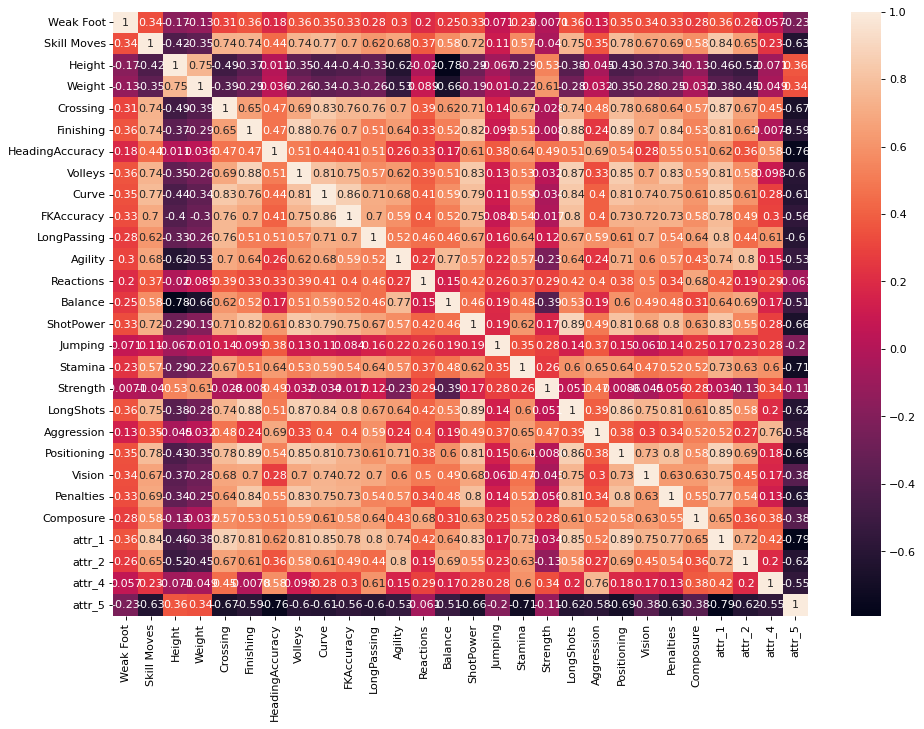

In [85]:
thr = 0.9 # correlation coefficient threshold, attributes correlated above the threshold will be merged

dff = df.select_dtypes(['number']).copy()
corr = dff.corr()
continueLoop = True
attr_id = 0;
while(continueLoop):
    continueLoop = False
    for i in range(0,len(corr)):
        attrs = [i]
        for j in range(0,len(corr)):
            if(i != j and corr.iloc[i,j] > thr):
                attrs.append(j)
        if (len(attrs) > 1):
            attr_name = 'attr_' + str(attr_id)
            attr_names = []
            for k in attrs:
                attr_names.append(dff.columns[k])
            print('Combining ' + str(attr_names) + ' into ' + attr_name)
            attr_id = attr_id + 1
            dff[attr_name] = dff.iloc[:,attrs].mean(axis=1)
            dff = dff.drop(dff.columns[attrs], axis=1)
            continueLoop = True
            corr = dff.corr()
            break;     
plt.figure(figsize=(14,10),dpi = 80)
sns.heatmap(dff.corr(),annot = dff.corr())
"Number of attributes after merging: " + str(len(dff.columns))

By merging highly correlated attributes (above 0.9), we were able to reduce the number of attributes from 38 to 28.

## Parameter selection

Please note that our model is meant to classify players into 23 positions. We are able to visually see in the data only relationships between large groups of players, e.g.: differences between offensive and defensive players or lateral and medial players. But our model needs to be much more accurate and include attributes that show differences between specific positions. It is difficult to "handpick" attributes for such a complex classifier. Therefore, we decided to use a ready-made parameter selection tool - **SelectKBest**.

SelectKBest tool is used in classification tasks to select the best attributes. Using the selected function, it evaluates the attributes and selects K of the best ones.

We used two evaluation functions: the default (ANOVA F) and chi2 (chi-square test) and several values of the number of K best attributes included in the model to find the configuration giving the most accurate model.

The most accurate model was obtained by discarding the 2 worst attributes according to the chi2 function: Reactions, Height. This means that we used 27 attributes. 

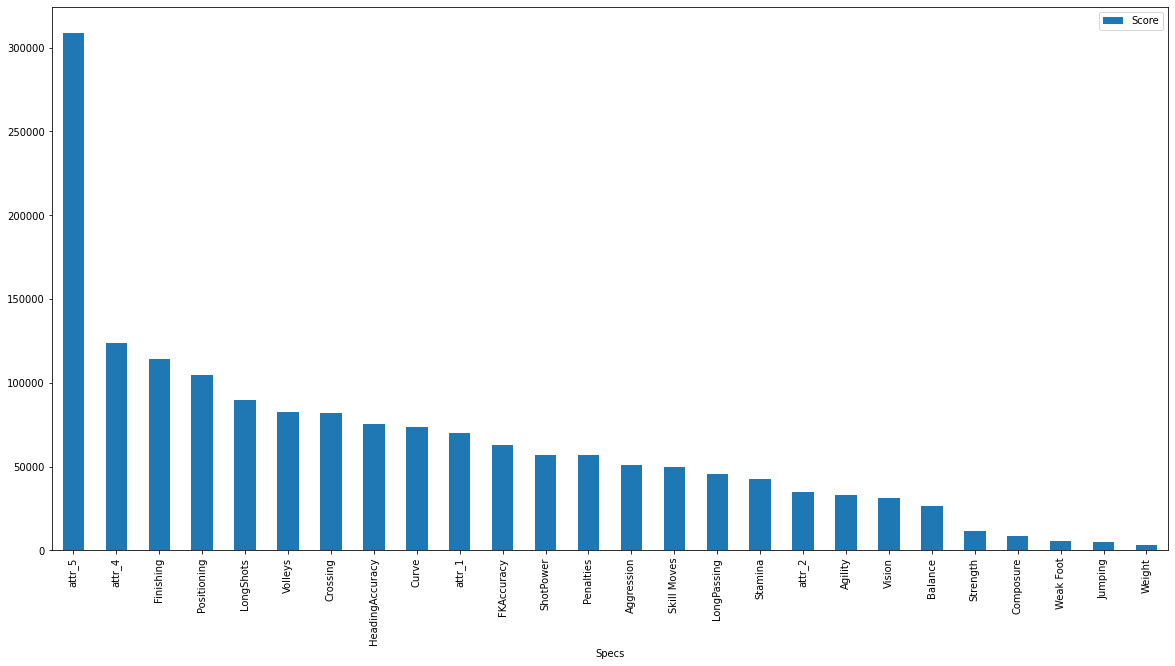

In [86]:
# SelectKBest
y = df['Position'] # target
X = dff

n = len(X.columns) - 2 # K - how many of the best attributes we include in the model

bestfeatures = SelectKBest(score_func=chi2, k=n)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
featureScores.nlargest(n,'Score').set_index('Specs').plot(kind='bar', figsize=(20,10))

X = X[featureScores.nlargest(n,'Score').iloc[:,0].values].join(isLeft)

We assigned the 4 classification models discussed in class along with a set of parameters: 
* K nearest neighbors
* Naive Bayesian classifier.
* Nearest Prototype Method.
* Decision tree

The GridSearchCV tool checks the accuracy of a given model for each set of parameters we provide. The accuracy is checked using the cross validation method so that we do not have to split the data into training and validation set. In this way, we will be able to select the best parameters for each model. Then, among the 4 models, we will select the one with the highest accuracy.

In [87]:
# model parameters checked by GridSearch
dt = {KNeighborsClassifier() : {'n_neighbors': np.arange(57, 63, 2)},
      NearestCentroid() : {'metric': ['euclidean', 'manhattan']},
      GaussianNB() : {},
      DecisionTreeClassifier() : {'max_depth': np.arange(5, 12)}}

# dividing data into training and test data
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.2)

best_estimator = None # the best_estimator variable will keep the best model (out of 4 selected) with the best parameters 
tmp = 0

for key in dt:
    m = GridSearchCV(key, dt[key])
    m.fit(X, y)
    
    if m.best_score_ > tmp:
        best_estimator = m.best_estimator_
        tmp = m.best_score_
    
    print ('Model {}'.format(type(key).__name__))
    print ('Best Result : {}'.format(m.best_score_))
    print ('Best Params: {}'.format(m.best_params_))
    print('\n\n')

Model KNeighborsClassifier
Best Result : 0.4833453581852042
Best Params: {'n_neighbors': 59}



Model NearestCentroid
Best Result : 0.3453030132548924
Best Params: {'metric': 'euclidean'}



Model GaussianNB
Best Result : 0.43681521300674114
Best Params: {}



Model DecisionTreeClassifier
Best Result : 0.4820163632898341
Best Params: {'max_depth': 8}





The best classification accuracy is obtained for the k nearest neighbor classifier (k = 59): ~48.3%

Almost identical, but minimally lower result we have for the decision tree (max depth 8): ~48.2%.

The naive Bayesian classifier is already clearly less accurate: ~43.7%.

The nearest prototype method gives clearly the worst result among the tested models: ~34.5%

## Verification of the best model

We create the model with the best result and the parameters indicated before GridSearchCV - **classifier k nearest neighbors (k = 59)**. However, this time we train it on test data because we want to analyze the accuracy of its classification on new (validation) data.

Since we have a lot of positions, instead of a confusion matrix, we create column plots to show which position the model assigned the players to relative to their true position.

Column chart - what position the model assigned the players to relative to their true position:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


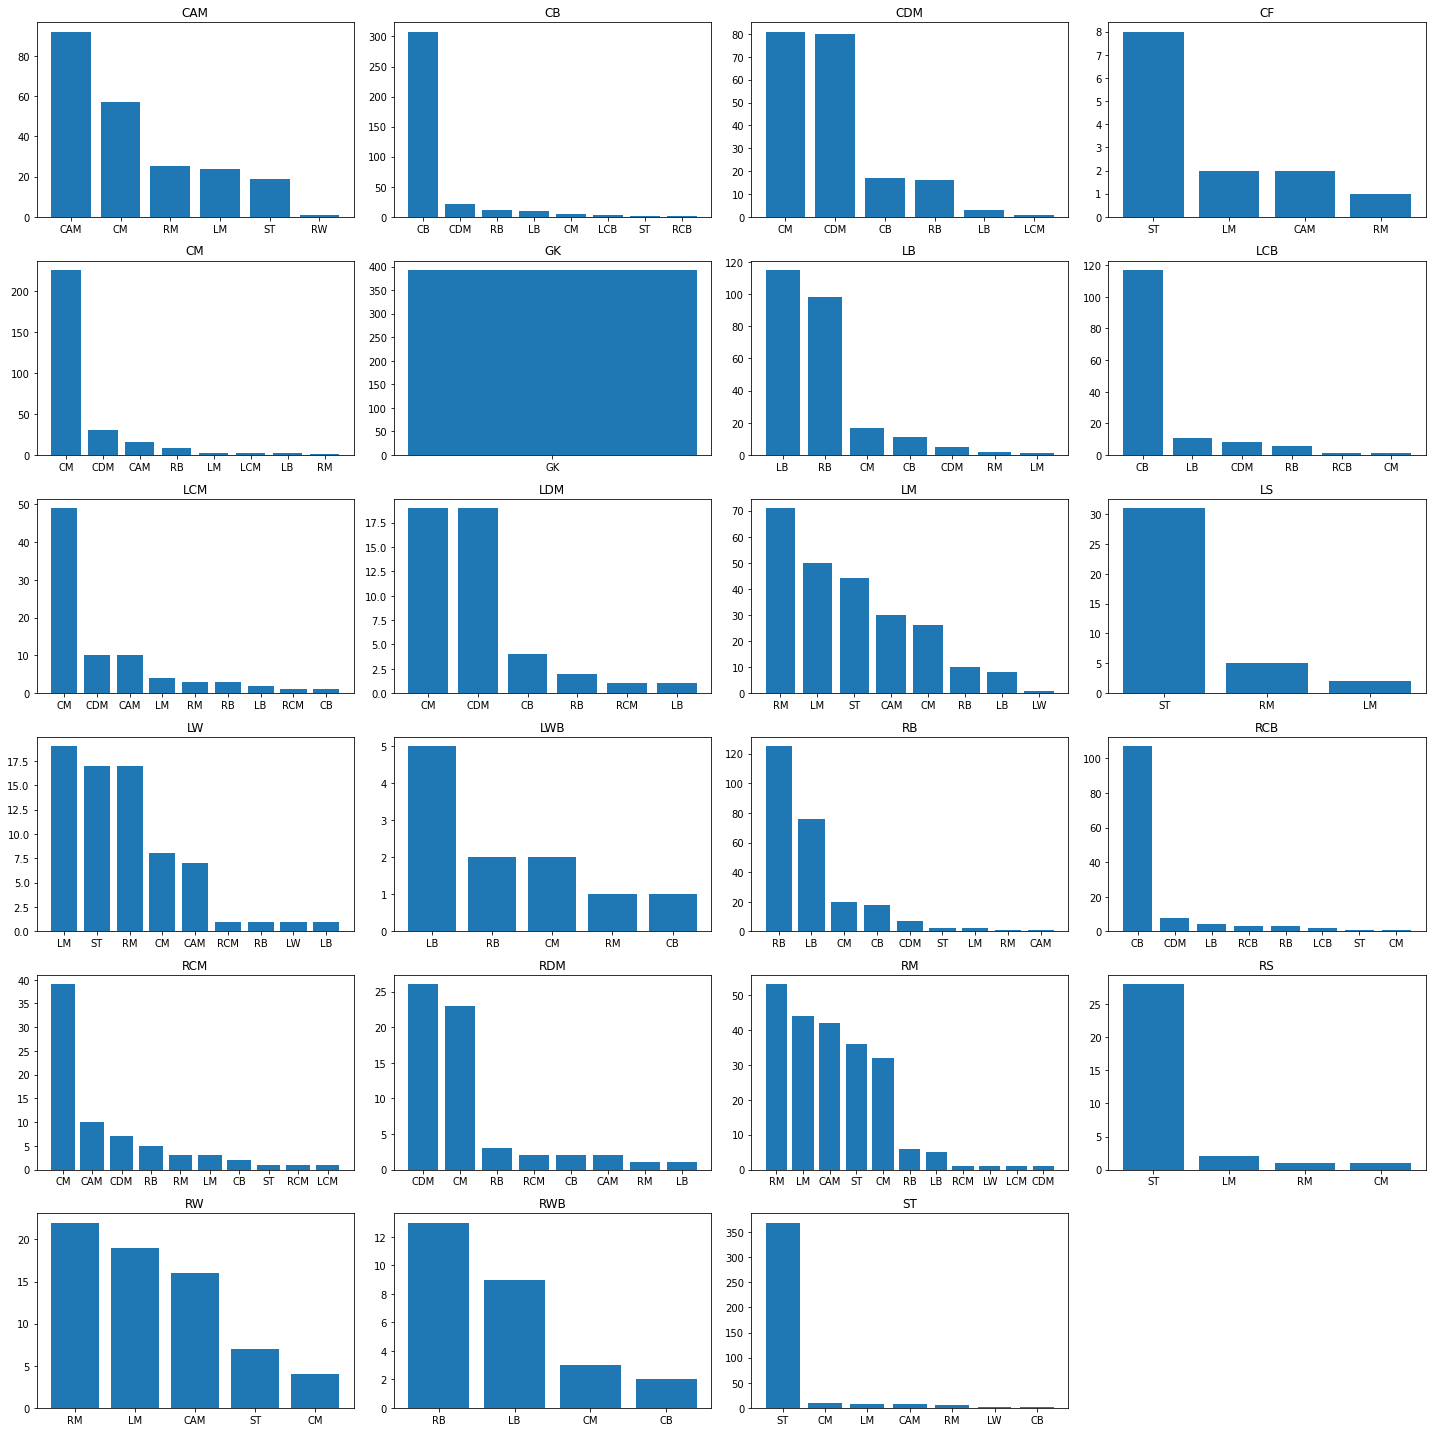

Percentage of correct match of players in a particular position:
GK     1.000000
ST     0.922500
CB     0.857939
CM     0.782007
RB     0.496032
LB     0.461847
CAM    0.422018
CDM    0.404040
RM     0.238739
LM     0.208333
RCB    0.023256
RCM    0.013889
LW     0.013889
LWB    0.000000
RWB    0.000000
LDM    0.000000
LCM    0.000000
LCB    0.000000
RDM    0.000000
RS     0.000000
CF     0.000000
RW     0.000000
LS     0.000000
dtype: float64


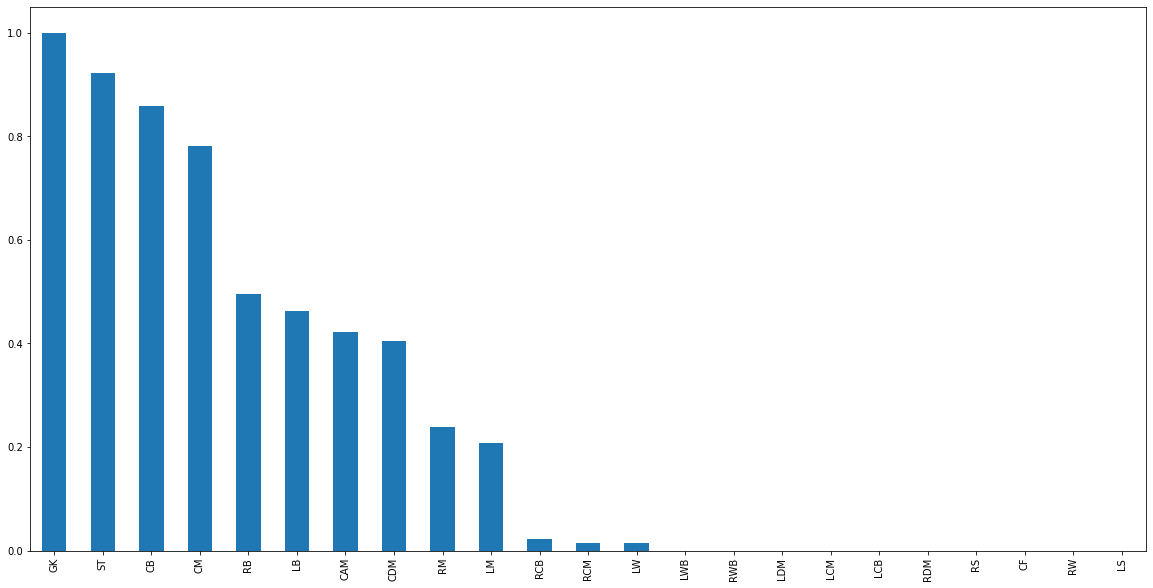

In [88]:
model = best_estimator
model.fit(train_x, train_y)
wynik_test = model.predict(val_x)

print("Column chart - what position the model assigned the players to relative to their true position:")
mp_test = pd.crosstab(val_y, wynik_test)

f = plt.figure(figsize=(20, 20))

ax = []
rate_df = pd.Series({})

j = 0
    
for i in range(0, len(mp_test.index)):
    r = mp_test.iloc[i]
    r = r[r != 0].sort_values(ascending=False)
    cname = mp_test.index[i]
    
    f.tight_layout()
    
    ax.append(f.add_subplot(6, 4,i+1))
    ax[i].title.set_text(cname)
    ax[i].bar(r.index, r, width = 0.8)
    
    if cname in mp_test.columns:
        rate_df[cname] = mp_test.iloc[i][j] / mp_test.iloc[i].sum()
        j += 1
    else:
        rate_df[cname] = 0
    
plt.show()

print("Percentage of correct match of players in a particular position:")
print(rate_df.sort_values(ascending=False))
        
rate_df.sort_values(ascending=False).plot(kind = 'bar', figsize=(20,10))

The best, flawless performance is for **GK** (goalkeeper). This is not surprising, however, as the goalkeeper characteristics clearly distinguished him from the others. 

We also have good efficiency (above 80%) for the positions **ST, CB, CM**. This means that for the 4 most numerous positions (and the most basic) our model performs very well.

We have lower efficiency (40-50%) for **LB, RB, CAM, CDM** positions. RB and LB positions are often confused with each other by the model. CDM is very often confused with CM and less often with defenders. CAM is often taken as CM, LM or RM.

We have an efficiency of ~20% for **LM, RM** positions. These positions are often confused with each other, but also with ST and CM.

Almost zero effectiveness we have for items **LW, LCM, RCB, LCB**.

For as many as 9 of the 23 positions we have zero matching accuracy. These are: **RCM, LWB, RWB, LDM, RDM, RS, CF, RW, LS**. Our data lack attributes that are able to clearly separate these items from the rest.

## On the low accuracy of the model
In general, an accuracy of less than 50% in classification seems to be not very satisfactory. However, this is primarily the fault not of the ill-fitting model, but of the data. Our data simply lacks attributes that would be able to clearly distinguish most of the items. For the most characteristic ones: GK, ST, CB, CM our model does very well. However, the more specific ones, like LCM, LS, RCB, are too uncharacteristic for our model to distinguish them. 

To prove this thesis, let's test the effectiveness of the model when matching footballers to 4 groups (forwards, midfielders, defenders, goalkeepers). We will use the same test data and model predictions.

In [89]:
# This time there is only 4 positions: 
# GK, DEF, MID i FWD
results = pd.DataFrame({})
results['real'] = val_y
results['pred'] = wynik_test
results['pred'] = results['pred'].map(lambda x: 'GK' if x in gk else ('DF' if x in defe else ('MF' if x in mid else 'FW')))
results['real'] = results['real'].map(lambda x: 'GK' if x in gk else ('DF' if x in defe else ('MF' if x in mid else 'FW')))
a = (len(results[results['pred'] == results['real']]) / len(results)) * 100
print('Model Effectiveness: ', a, '%')

Model Effectiveness:  86.86030428769018 %


As you can see, the effectiveness of our model when dividing the players only into 4 basic positions is very high - over 87%. Taking into account, that we have not optimized our model for such classification, probably it would be possible to get even higher accuracy.

# Summary

The K nearest neighbor classifier (k = 59) proved to be the most effective model in our task.

In [90]:
cross_val_score(estimator=best_estimator, X=X, y=y, cv=5).mean()

0.4833453581852042

The effectiveness of the obtained classification for all positions is equal to ~48.3% (using cross-validation on the whole set). Considering the number of positions to which our model had to assign players (23), this is not a bad result. It only proves that there were no features in our data that allowed such an accurate distribution.

Basically, in soccer we have 4 positions: goalkeeper, defender, midfielder and striker. And looking at it from this angle, the players in each position are clearly different from each other. A striker has better finishing, a midfielder has better passing, a defender has better sliding, while a goalkeeper has a completely different set of skills. Fifa, however, distinguishes many more positions that are very specific. These are often related more to formations than to specific characteristics of a footballer. If we have as many as 23 different positions (originally there were 27 in the data!) it is logical that most of them will be very similar. To sum up, we can distinguish positions of players by their physical features and skills, but it makes sense only to a certain degree of accuracy - 23 positions is a bit too much.